In [2]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn
import seaborn as sns
import datetime as dt

from plotly.offline import init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization

from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition
from sklearn import metrics

In [3]:
curated_pkl = pd.read_pickle('curated_df.pkl')

In [ ]:
df=curated_pkl.copy()

In [5]:
df.head()

,id_equipo,nombre_producto,capacidad,industria,volumen_escl,consumo_escl
timestamp,,,,,,
2021-01-01 00:00:00,477,VP Nafta,15032,Service Station,0.0575871,0
2021-01-01 00:05:00,477,VP Nafta,15032,Service Station,0.0575871,0
2021-01-01 00:10:00,477,VP Nafta,15032,Service Station,0.0575871,0
2021-01-01 00:15:00,477,VP Nafta,15032,Service Station,0.0575871,0
2021-01-01 00:20:00,477,VP Nafta,15032,Service Station,0.0575428,1.10766e-05


In [6]:
df_fil=df.loc[:"2021-01-7"]

In [7]:
df_fil.head()

,id_equipo,nombre_producto,capacidad,industria,volumen_escl,consumo_escl
timestamp,,,,,,
2021-01-01 00:00:00,477,VP Nafta,15032,Service Station,0.0575871,0
2021-01-01 00:05:00,477,VP Nafta,15032,Service Station,0.0575871,0
2021-01-01 00:10:00,477,VP Nafta,15032,Service Station,0.0575871,0
2021-01-01 00:15:00,477,VP Nafta,15032,Service Station,0.0575871,0
2021-01-01 00:20:00,477,VP Nafta,15032,Service Station,0.0575428,1.10766e-05


In [8]:
df_fil=df_fil.reset_index()

In [9]:
features=df_fil[["capacidad", "volumen_escl", "consumo_escl"]]

In [10]:
features

,capacidad,volumen_escl,consumo_escl
0,15032,0.0575871,0
1,15032,0.0575871,0
2,15032,0.0575871,0
3,15032,0.0575871,0
4,15032,0.0575428,1.10766e-05
...,...,...,...
294799,5000,0.294,0
294800,5000,0.294,0
294801,5000,0.294,0
294802,5000,0.294,0


In [11]:
features.columns

Index(['capacidad', 'volumen_escl', 'consumo_escl'], dtype='object')

In [ ]:
sns_plot=sns.pairplot(features)
sns_plot

### Kmeans

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

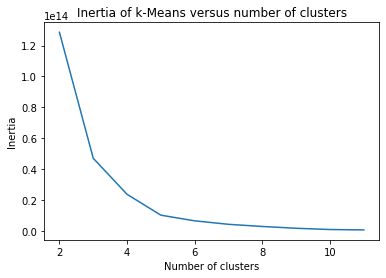

In [16]:
#Prueba: para elegir el hiperparámetro n_clusters, variando de 2 a 11 clusters
scores = [KMeans(n_clusters=i).fit(features).inertia_ for i in range(2,12)]

plt.plot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

Automatically created module for IPython interactive environment


KeyboardInterrupt: 

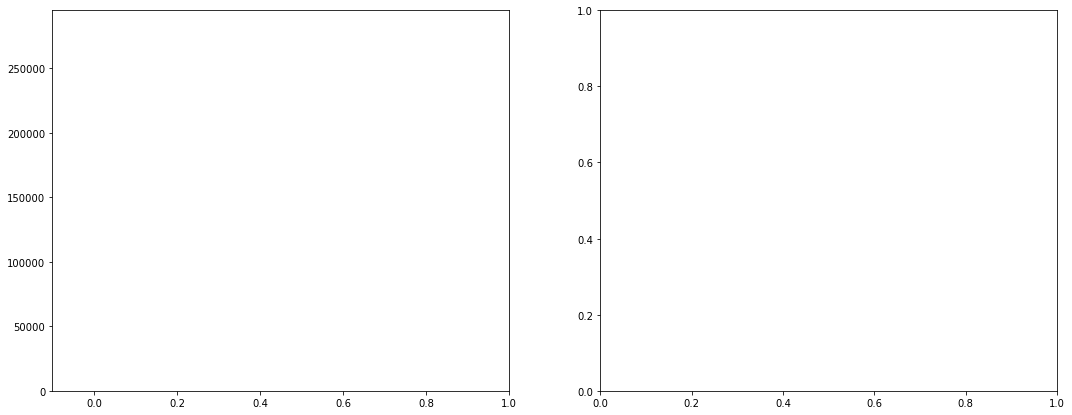

In [17]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

X=features

range_n_clusters = [2,3, 4, 5, 6]
sse ={}
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    sse[n_clusters] = clusterer.inertia_

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("Para n_clusters =", n_clusters,
          "El silhouette_score promedio es :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Visualizacion de los datos.")
    ax1.set_xlabel("espacio de la primera caracteristica")
    ax1.set_ylabel("espacio de la segunda caracteristica")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X.iloc[:, 0], X.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("Visualizacion de los datos.")
    ax2.set_xlabel("espacio de la primera caracteristica")
    ax2.set_ylabel("espacio de la segunda caracteristica")

    plt.suptitle(("Analisis de silueta para Kmedias "
                  "con n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    #plt.savefig("kmeans_%d" % n_clusters, dpi=300)

plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
plt.suptitle(("Metodo del codo para kmedias "),
                 fontsize=14, fontweight='bold')
ax1.plot(list(sse.keys()), list(sse.values()))
ax1.set_xlabel("Numero of cluster")
ax1.set_ylabel("Inercia")

clusterer = KMeans(n_clusters=4, random_state=10)
cluster_labels = clusterer.fit_predict(X)
    
colors = cm.nipy_spectral(cluster_labels.astype(float) / 4)
ax2.scatter(X.iloc[:, 0], X.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,c=colors, edgecolor='k')

# Labeling the clusters
centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
ax2.scatter(centers[:, 0], centers[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')

ax2.set_title("Visualizacion de los datos.")
ax2.set_xlabel("espacio de la primera caracteristica")
ax2.set_ylabel("espacio de la segunda caracteristica")

#plt.savefig("kmeans_elbow", dpi=300)
plt.show()

In [18]:
# Número de clusters buscado
n_clust = 3

km = KMeans(n_clusters=n_clust)
km.fit(features) #utiliza todas las habilidades: 34 dimensiones

# Recuperacion de etiquetas
clusters = km.labels_

In [19]:
df_fil["kmeans"]=km.labels_

In [20]:
kmean_clusters = go.Scatter(x=features["capacidad"], y=features["volumen_escl"],
                           mode='markers',
                        text=df_fil.loc[:,'id_equipo'],
                           marker=dict(
                                size=5,
                                color = clusters.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )
data=[kmean_clusters]

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title="Capacidad"),
                yaxis=dict(title="Volumen"),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)

plot(fig)

'temp-plot.html'

In [21]:
# Número de clusters buscado
n_clust = 5

km = KMeans(n_clusters=n_clust)
km.fit(features) #utiliza todas las habilidades: 34 dimensiones

# Recuperacion de etiquetas
clusters = km.labels_

In [22]:
kmean_clusters = go.Scatter(x=features["capacidad"], y=features["volumen_escl"],
                           mode='markers',
                        text=df_fil.loc[:,'id_equipo'],
                           marker=dict(
                                size=5,
                                color = clusters.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )
data=[kmean_clusters]

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title="Capacidad"),
                yaxis=dict(title="Volumen"),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)

plot(fig)

'temp-plot.html'

In [ ]:
df_fil.kmeans.value_counts()

### MeanShift

In [ ]:
ms = MeanShift(bandwidth=2, bin_seeding=True)

ms.fit(features)

clusters2 = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(clusters2)
n_clusters_ = len(labels_unique)

print("Cantidad de clusters encontrados por Mean Shift : %d" % n_clusters_)

In [ ]:
df_fil['MeanShift'] = ms.labels_ #clusters2